<a href="https://colab.research.google.com/github/UttaraKet1607/Malarial-Cell-Image-Segmentation/blob/main/Segmentation_with_baseline_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparative study of segmentation of malarial cell images using multiple pathways

### 1. Download the dataset from kaggle using colab commands or directly from [kaggle datasets](https://www.kaggle.com/iarunava/cell-images-for-detecting-malaria)

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download iarunava/cell-images-for-detecting-malaria
! unzip cell-images-for-detecting-malaria.zip

### 2. Import required libraries or modules

In [71]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
print(os.listdir("/content/cell_images"))

['Uninfected', 'Parasitized', 'cell_images', 'Parasitized_segmented', 'Uninfected_segmented']


In [72]:
import cv2
import matplotlib.pyplot as plt 
import seaborn as sns
import os
from PIL import Image
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.utils import np_utils

### 3. Understand the data

#### 3.1 Visualize a few samples of the data

In [73]:
parasitized_data = os.listdir('/content/cell_images/Parasitized')
print(parasitized_data[:10]) #the output we get are the .png files

uninfected_data = os.listdir('/content/cell_images/Uninfected/')
print('\n')
print(uninfected_data[:10])

['C109P70ThinF_IMG_20150930_103811_cell_158.png', 'C123P84ThinF_IMG_20151002_151432_cell_160.png', 'C116P77ThinF_IMG_20150930_171844_cell_98.png', 'C180P141NThinF_IMG_20151201_165453_cell_45.png', 'C184P145ThinF_IMG_20151203_103114_cell_144.png', 'C170P131ThinF_IMG_20151119_120111_cell_236.png', 'C68P29N_ThinF_IMG_20150819_134112_cell_156.png', 'C158P119ThinF_IMG_20151115_181558_cell_200.png', 'C59P20thinF_IMG_20150803_113430_cell_17.png', 'C68P29N_ThinF_IMG_20150819_133236_cell_141.png']


['C96P57ThinF_IMG_20150824_112132_cell_74.png', 'C137P98ThinF_IMG_20151005_163218_cell_25.png', 'C209ThinF_IMG_20151029_160927_cell_263.png', 'C160P121ThinF_IMG_20151116_093748_cell_4.png', 'C68P29N_ThinF_IMG_20150819_134504_cell_95.png', 'C160P121ThinF_IMG_20151116_093704_cell_135.png', 'C163P124ThinF_IMG_20151116_110921_cell_142.png', 'C90P51ThinF_IMG_20150821_115310_cell_10.png', 'C223ThinF_IMG_20151112_104708_cell_33.png', 'C77P38ThinF_IMG_20150602_111510_cell_120.png']


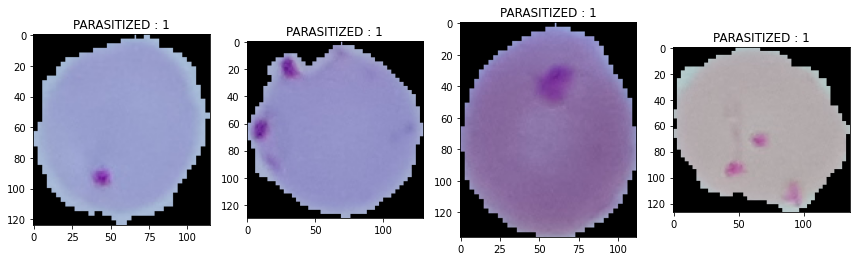

In [74]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread('/content/cell_images/Parasitized' + "/" + parasitized_data[i])
    plt.imshow(img)
    plt.title('PARASITIZED : 1')
    plt.tight_layout()
plt.show()

#### 3.2 Resize all images and save image data as numpy array along with labels [0,1] 

In [75]:
data = []
labels = []
for img in parasitized_data:
    try:
        img_read = plt.imread('/content/cell_images/Parasitized' + "/" + img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(1)
    except:
        None
        
for img in uninfected_data:
    try:
        img_read = plt.imread('/content/cell_images/Uninfected' + "/" + img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(0)
    except:
        None

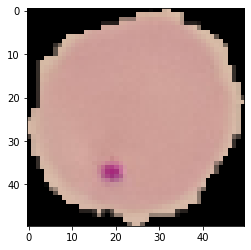

In [76]:
plt.imshow(data[0])
plt.show()

In [77]:
image_data = np.array(data)
labels = np.array(labels)

In [78]:
idx = np.arange(image_data.shape[0])
image_data = image_data[idx]
labels = labels[idx]

In [79]:
image_data.shape, labels.shape

((27558, 50, 50, 3), (27558,))

### 4. Train a baseline CNN model on the data

In [80]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from tensorflow.keras.optimizers import RMSprop, Adam
import matplotlib.pyplot as plt
from tensorflow.keras import callbacks
from tensorflow.keras.utils import plot_model

In [81]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(image_data, labels, test_size = 0.2, random_state = 101)

In [82]:
y_train = np_utils.to_categorical(y_train, num_classes = 2)
y_test = np_utils.to_categorical(y_test, num_classes = 2)

In [83]:
print(f'SHAPE OF TRAINING IMAGE DATA : {x_train.shape}')
print(f'SHAPE OF TESTING IMAGE DATA : {x_test.shape}')
print(f'SHAPE OF TRAINING LABELS : {y_train.shape}')
print(f'SHAPE OF TESTING LABELS : {y_test.shape}')

SHAPE OF TRAINING IMAGE DATA : (22046, 50, 50, 3)
SHAPE OF TESTING IMAGE DATA : (5512, 50, 50, 3)
SHAPE OF TRAINING LABELS : (22046, 2)
SHAPE OF TESTING LABELS : (5512, 2)


In [84]:
tf.random.set_seed(42)

model = Sequential()
model.add(Conv2D(64,(3,3),activation='relu',input_shape= (50,50,3)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',input_shape= (50,50,3)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(32,(3,3),activation='relu',input_shape= (50,50,3)))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(2,activation='sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 48, 48, 64)        1792      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 24, 24, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 22, 22, 64)        36928     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 11, 11, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 9, 9, 32)          18464     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 4, 4, 32)        

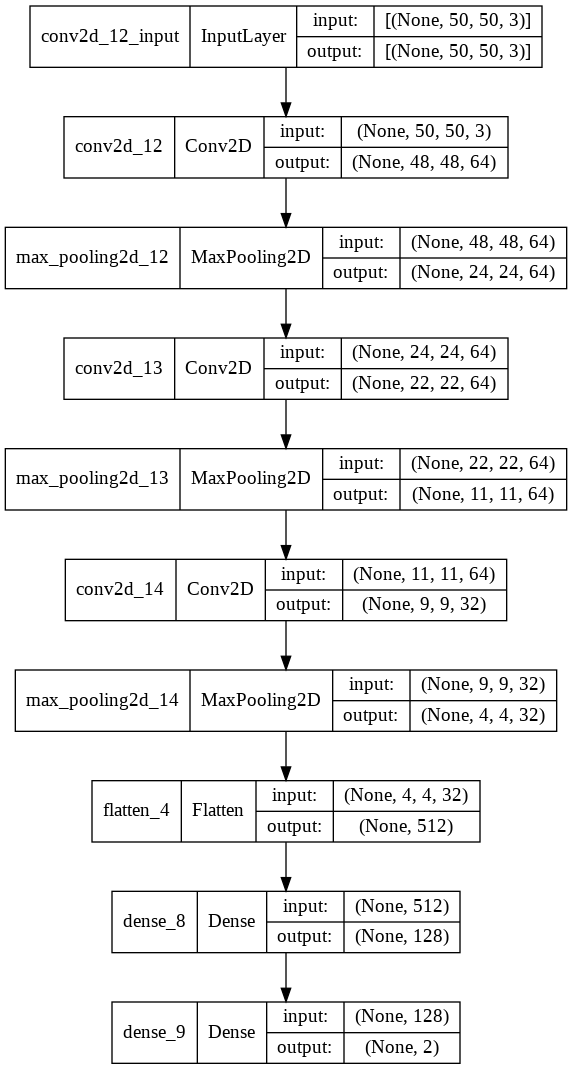

In [85]:
plot_model(model = model, show_shapes=True)

In [86]:
model.compile(optimizer=Adam(lr=0.001),loss='binary_crossentropy',metrics = ['accuracy','Precision','Recall'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [87]:
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs = 10)

Epoch 1/10
689/689 [==============================] - 13s 17ms/step - loss: 0.3776 - accuracy: 0.8150 - precision: 0.8175 - recall: 0.8128 - val_loss: 0.1933 - val_accuracy: 0.9403 - val_precision: 0.9394 - val_recall: 0.9399
Epoch 2/10
689/689 [==============================] - 11s 16ms/step - loss: 0.1734 - accuracy: 0.9448 - precision: 0.9444 - recall: 0.9448 - val_loss: 0.1615 - val_accuracy: 0.9505 - val_precision: 0.9510 - val_recall: 0.9505
Epoch 3/10
689/689 [==============================] - 11s 17ms/step - loss: 0.1487 - accuracy: 0.9525 - precision: 0.9521 - recall: 0.9530 - val_loss: 0.1606 - val_accuracy: 0.9528 - val_precision: 0.9528 - val_recall: 0.9532
Epoch 4/10
689/689 [==============================] - 11s 16ms/step - loss: 0.1389 - accuracy: 0.9550 - precision: 0.9551 - recall: 0.9548 - val_loss: 0.1419 - val_accuracy: 0.9575 - val_precision: 0.9576 - val_recall: 0.9579
Epoch 5/10
689/689 [==============================] - 12s 17ms/step - loss: 0.1271 - accuracy: 0

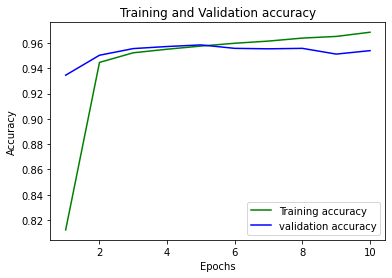

In [23]:
accuracy_train = history.history['accuracy']
accuracy_val = history.history['val_accuracy']
epochs = range(1,11)
plt.plot(epochs, accuracy_train, 'g', label='Training accuracy')
plt.plot(epochs, accuracy_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

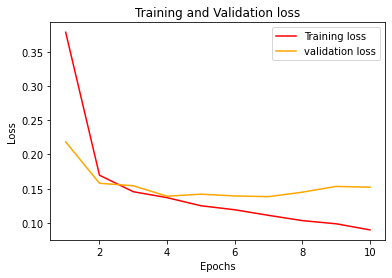

In [24]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
plt.plot(epochs, loss_train, 'r', label='Training loss')
plt.plot(epochs, loss_val, 'orange', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### 5. Image segmentation

#### 5.1 Implement traditional segmentation technique (using thresholding) on a single image 

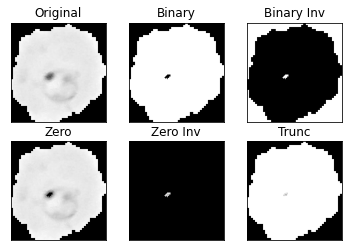

In [25]:
imgpath1 =  "/content/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png"
img = cv2.imread(imgpath1, 0)
th = 0
max_val = 255
    
ret, o1 = cv2.threshold(img, th, max_val, cv2.THRESH_BINARY + cv2.THRESH_OTSU )
ret, o2 = cv2.threshold(img, th, max_val, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU )
ret, o3 = cv2.threshold(img, th, max_val, cv2.THRESH_TOZERO + cv2.THRESH_OTSU )
ret, o4 = cv2.threshold(img, th, max_val, cv2.THRESH_TOZERO_INV + cv2.THRESH_OTSU )
ret, o5 = cv2.threshold(img, th, max_val, cv2.THRESH_TRUNC + cv2.THRESH_OTSU )
    
output = [img, o1, o2, o3, o4, o5]
    
titles = ['Original', 'Binary', 'Binary Inv',
              'Zero', 'Zero Inv', 'Trunc']
    
for i in range(6):
        plt.subplot(2, 3, i+1)
        plt.imshow(output[i], cmap='gray')
        plt.title(titles[i])
        plt.xticks([])
        plt.yticks([])

plt.show()  

#### 5.2 Implement traditional image segmentation on multiple images and generate a segmented mask 

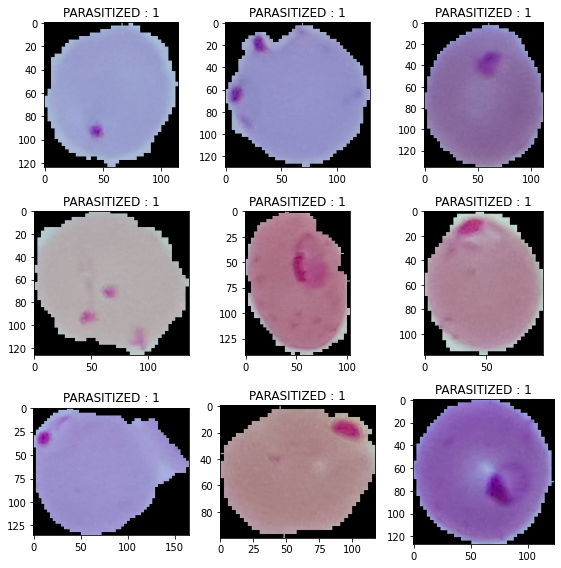

In [26]:
plt.figure(figsize = (8,8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    img = cv2.imread('/content/cell_images/Parasitized' + "/" + parasitized_data[i])
    plt.imshow(img, cmap='gray')
    plt.title('PARASITIZED : 1')
    plt.tight_layout()
plt.show()

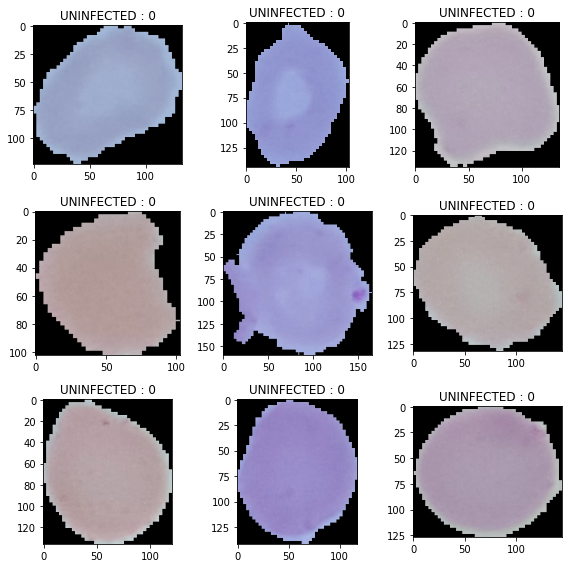

In [27]:
plt.figure(figsize = (8,8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    img = cv2.imread('/content/cell_images/Uninfected' + "/" + uninfected_data[i])
    plt.imshow(img, cmap='gray')
    plt.title('UNINFECTED : 0')
    plt.tight_layout()
plt.show()

##### 5.2.1 Segmentation mask using `cv2.THRESH_TOZERO_INV+cv2.THRESH_OTSU`

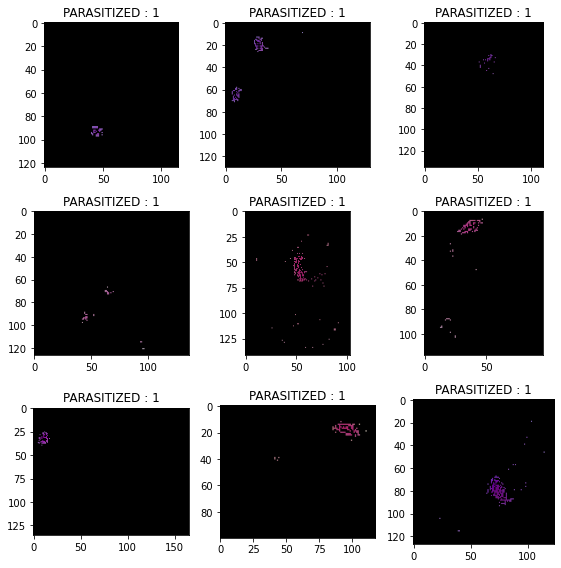

In [28]:
plt.figure(figsize = (8,8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    image1 = cv2.imread('/content/cell_images/Parasitized' + "/" + parasitized_data[i])
    image = cv2.imread('/content/cell_images/Parasitized' + "/" + parasitized_data[i],0)
    kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    img = cv2.filter2D(image, ddepth=-1, kernel=kernel)
    ret, thresh = cv2.threshold(img,0,255,cv2.THRESH_TOZERO_INV+cv2.THRESH_OTSU)
    output1 = cv2.bitwise_and(image1, image1, mask = thresh)
    plt.imshow(output1, cmap='gray')
    plt.title('PARASITIZED : 1')
    plt.tight_layout()
plt.show()

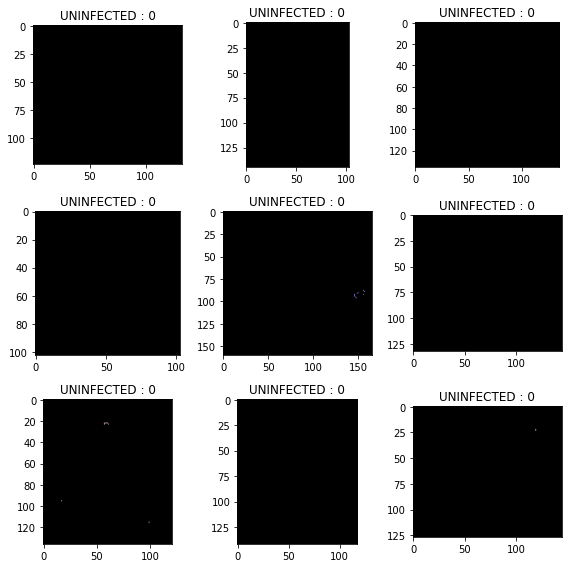

In [29]:
plt.figure(figsize = (8,8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    image1 = cv2.imread('/content/cell_images/Uninfected' + "/" + uninfected_data[i])
    image = cv2.imread('/content/cell_images/Uninfected' + "/" + uninfected_data[i],0)
    kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    img = cv2.filter2D(image, ddepth=-1, kernel=kernel)
    ret, thresh = cv2.threshold(img,0,255,cv2.THRESH_TOZERO_INV+cv2.THRESH_OTSU)
    output1 = cv2.bitwise_and(image1, image1, mask = thresh)
    plt.imshow(output1, cmap='gray')
    plt.title('UNINFECTED : 0')
    plt.tight_layout()
plt.show()

##### 5.2.2 Segmentation mask using watershed algorithm on top of `cv2.THRESH_TOZERO_INV+cv2.THRESH_OTSU`

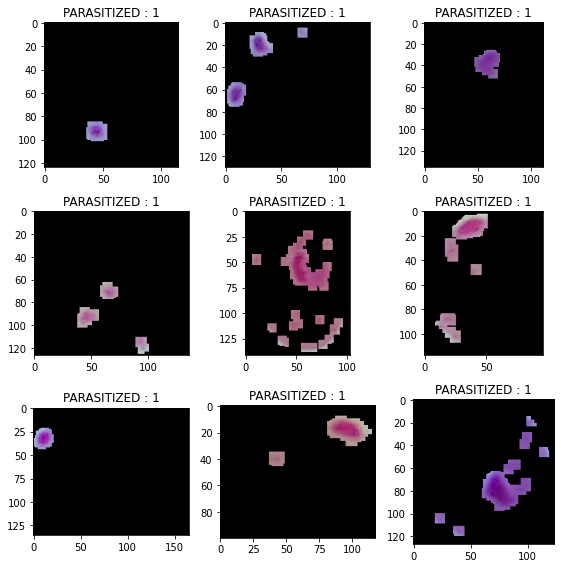

In [30]:
plt.figure(figsize = (8,8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    image1 = cv2.imread('/content/cell_images/Parasitized' + "/" + parasitized_data[i])
    image = cv2.imread('/content/cell_images/Parasitized' + "/" + parasitized_data[i],0)
    kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    img = cv2.filter2D(image, ddepth=-1, kernel=kernel)
    ret, thresh = cv2.threshold(img,0,255,cv2.THRESH_TOZERO_INV+cv2.THRESH_OTSU)
    # noise removal
    kernel = np.ones((3,3),np.uint8)
    #opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
    closing = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE,kernel, iterations = 2)
    # sure background area
    sure_bg = cv2.dilate(closing,kernel,iterations=4)
    output1 = cv2.bitwise_and(image1, image1, mask = sure_bg)
    #medianBlur = cv2.medianBlur(output1, 3)
    plt.imshow(output1, cmap='gray')
    plt.title('PARASITIZED : 1')
    plt.tight_layout()
plt.show()

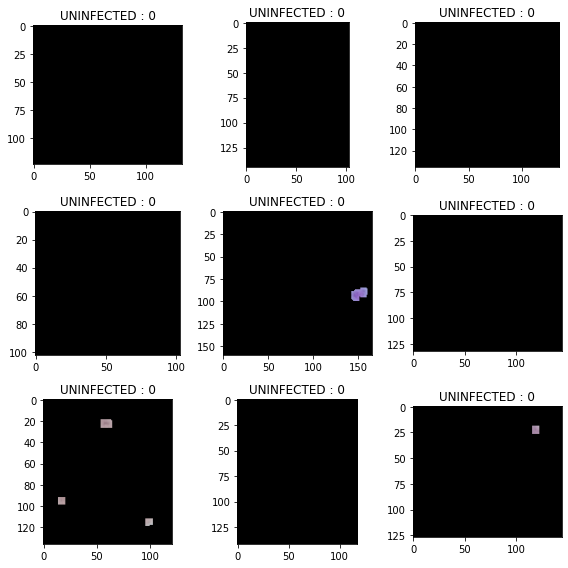

In [31]:
plt.figure(figsize = (8,8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    image1 = cv2.imread('/content/cell_images/Uninfected' + "/" + uninfected_data[i])
    image = cv2.imread('/content/cell_images/Uninfected' + "/" + uninfected_data[i],0)
    kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    img = cv2.filter2D(image, ddepth=-1, kernel=kernel)
    ret, thresh = cv2.threshold(img,0,255,cv2.THRESH_TOZERO_INV+cv2.THRESH_OTSU)
    # noise removal
    kernel = np.ones((3,3),np.uint8)
    #opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
    closing = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE,kernel, iterations = 2)
    # sure background area
    sure_bg = cv2.dilate(closing,kernel,iterations=3)
    output1 = cv2.bitwise_and(image1, image1, mask = sure_bg)
    plt.imshow(output1, cmap='gray')
    plt.title('UNINFECTED : 0')
    plt.tight_layout()
plt.show()

##### 5.2.3 Segmentation using k-means algorithm

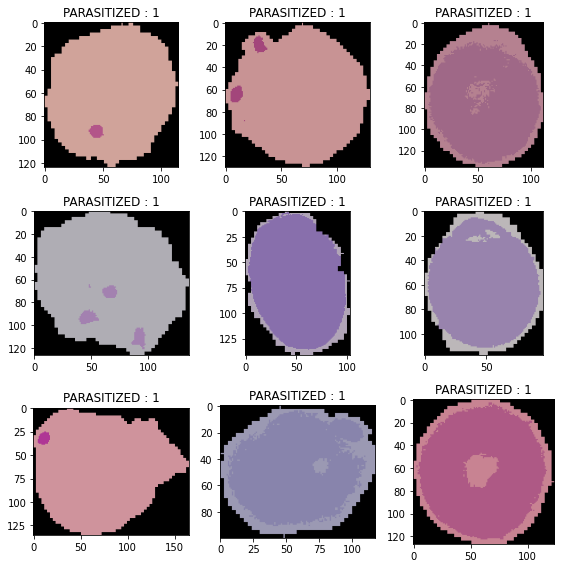

In [32]:
plt.figure(figsize = (8,8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    image = cv2.imread('/content/cell_images/Parasitized' + "/" + parasitized_data[i])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Reshaping the image into a 2D array of pixels and 3 color values (RGB)
    pixel_vals = image.reshape((-1,3))
    # Convert to float type
    pixel_vals = np.float32(pixel_vals)   
    #the below line of code defines the criteria for the algorithm to stop running, which will happen is 100 iterations are run or the epsilon (which is the required accuracy) becomes 85%
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.95)
    # then perform k-means clustering wit h number of clusters defined as 3 also random centres are initially choosed for k-means clustering
    k = 3
    retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    # convert data into 8-bit values
    centers = np.uint8(centers)
    segmented_data = centers[labels.flatten()]
    # reshape data into the original image dimensions
    segmented_image = segmented_data.reshape((image.shape))
    plt.imshow(segmented_image, cmap='gray')
    plt.title('PARASITIZED : 1')
    plt.tight_layout()
plt.show()

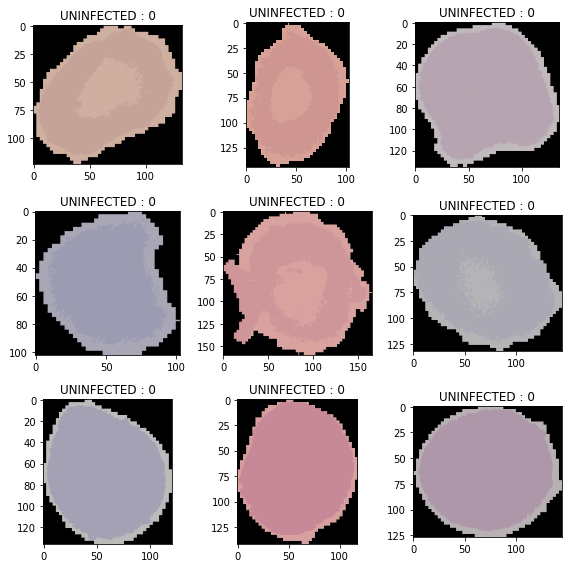

In [33]:
plt.figure(figsize = (8,8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    # Read in the image
    image = cv2.imread('/content/cell_images/Uninfected' + "/" + uninfected_data[i])
    # Change color to RGB (from BGR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Reshaping the image into a 2D array of pixels and 3 color values (RGB)
    pixel_vals = image.reshape((-1,3))
    # Convert to float type
    pixel_vals = np.float32(pixel_vals)   
    #the below line of code defines the criteria for the algorithm to stop running, which will happen is 100 iterations are run or the epsilon (which is the required accuracy) becomes 85%
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
    # then perform k-means clustering wit h number of clusters defined as 3 also random centres are initially choosed for k-means clustering
    k = 3
    retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    # convert data into 8-bit values
    centers = np.uint8(centers)
    segmented_data = centers[labels.flatten()]
    # reshape data into the original image dimensions
    segmented_image = segmented_data.reshape((image.shape))
    plt.imshow(segmented_image, cmap='gray')
    plt.title('UNINFECTED : 0')
    plt.tight_layout()
plt.show()

### 6. Generate segmented data for all image samples in the dataset

#### 6.1 Watershed algorithm on top of `cv2.THRESH_TOZERO_INV+cv2.THRESH_OTSU`

In [34]:
import os 
infected_dir = "/content/cell_images/Parasitized_segmented"
os.mkdir(infected_dir) 
uninfected_dir = "/content/cell_images/Uninfected_segmented"
os.mkdir(uninfected_dir) 

In [ ]:
for images in parasitized_data:
  try:
    image1 = cv2.imread('/content/cell_images/Parasitized' + "/" + images)
    image = cv2.imread('/content/cell_images/Parasitized' + "/" + images,0)
    kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    img = cv2.filter2D(image, ddepth=-1, kernel=kernel)
    ret, thresh = cv2.threshold(img,0,255,cv2.THRESH_TOZERO_INV+cv2.THRESH_OTSU)
    # noise removal
    kernel = np.ones((3,3),np.uint8)
    #opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
    closing = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE,kernel, iterations = 2)
    # sure background area
    sure_bg = cv2.dilate(closing,kernel,iterations=4)
    output1 = cv2.bitwise_and(image1, image1, mask = sure_bg)
    isWritten = cv2.imwrite('/content/cell_images/Parasitized_segmented' + "/" + images, output1)        
    if isWritten:
	        print('Image is successfully saved as file.')
  except:
    None

In [ ]:
for images in uninfected_data:
  try:
    image1 = cv2.imread('/content/cell_images/Uninfected' + "/" + images)
    image = cv2.imread('/content/cell_images/Uninfected' + "/" + images,0)
    kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    img = cv2.filter2D(image, ddepth=-1, kernel=kernel)
    ret, thresh = cv2.threshold(img,0,255,cv2.THRESH_TOZERO_INV+cv2.THRESH_OTSU)
    # noise removal
    kernel = np.ones((3,3),np.uint8)
    #opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
    closing = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE,kernel, iterations = 2)
    # sure background area
    sure_bg = cv2.dilate(closing,kernel,iterations=4)
    output1 = cv2.bitwise_and(image1, image1, mask = sure_bg)
    isWritten = cv2.imwrite('/content/cell_images/Uninfected_segmented' + "/" + images, output1)        
    if isWritten:
	        print('Image is successfully saved as file.')
  except:
    None

In [37]:
#!zip -r /content/cell_images.zip /content/cell_images/

#### 6.2 Cross check if all image files are saved successfully 

In [38]:
import os

list = os.listdir('/content/cell_images/Parasitized') # dir is your directory path
number_files = len(list)
list = os.listdir('/content/cell_images/Parasitized_segmented') # dir is your directory path
number_files = len(list)
print(number_files)
print(len(parasitized_data))

13779
13780


In [39]:
list = os.listdir('/content/cell_images/Uninfected') # dir is your directory path
number_files = len(list)
list = os.listdir('/content/cell_images/Uninfected_segmented') # dir is your directory path
number_files = len(list)
print(number_files)
print(len(uninfected_data))

13779
13780


### 7. Load in segmented data

#### 7.1 Visualize a few samples of segmented data

In [40]:
seg_parasitized_data = os.listdir('/content/cell_images/Parasitized_segmented')
print(seg_parasitized_data[:10]) #the output we get are the .png files

seg_uninfected_data = os.listdir('/content/cell_images/Uninfected_segmented')
print('\n')
print(seg_uninfected_data[:10])

['C109P70ThinF_IMG_20150930_103811_cell_158.png', 'C123P84ThinF_IMG_20151002_151432_cell_160.png', 'C116P77ThinF_IMG_20150930_171844_cell_98.png', 'C180P141NThinF_IMG_20151201_165453_cell_45.png', 'C184P145ThinF_IMG_20151203_103114_cell_144.png', 'C170P131ThinF_IMG_20151119_120111_cell_236.png', 'C68P29N_ThinF_IMG_20150819_134112_cell_156.png', 'C158P119ThinF_IMG_20151115_181558_cell_200.png', 'C59P20thinF_IMG_20150803_113430_cell_17.png', 'C68P29N_ThinF_IMG_20150819_133236_cell_141.png']


['C96P57ThinF_IMG_20150824_112132_cell_74.png', 'C137P98ThinF_IMG_20151005_163218_cell_25.png', 'C209ThinF_IMG_20151029_160927_cell_263.png', 'C160P121ThinF_IMG_20151116_093748_cell_4.png', 'C68P29N_ThinF_IMG_20150819_134504_cell_95.png', 'C160P121ThinF_IMG_20151116_093704_cell_135.png', 'C163P124ThinF_IMG_20151116_110921_cell_142.png', 'C90P51ThinF_IMG_20150821_115310_cell_10.png', 'C223ThinF_IMG_20151112_104708_cell_33.png', 'C77P38ThinF_IMG_20150602_111510_cell_120.png']


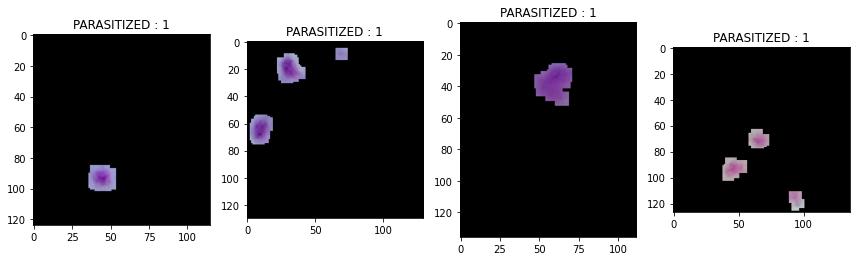

In [41]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread('/content/cell_images/Parasitized_segmented' + "/" + seg_parasitized_data[i])
    plt.imshow(img)
    plt.title('PARASITIZED : 1')
    plt.tight_layout()
plt.show()

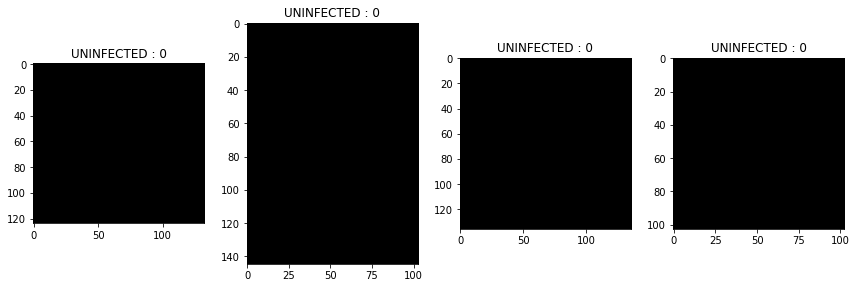

In [42]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread('/content/cell_images/Uninfected_segmented' + "/" + seg_uninfected_data[i])
    plt.imshow(img)
    plt.title('UNINFECTED : 0')
    plt.tight_layout()
plt.show()

#### 7.2 Resize all segmented images and save image data as numpy array along with labels [0,1] 

In [43]:
data = []
labels = []
for img1 in seg_parasitized_data:
    try:
        img_read = plt.imread('/content/cell_images/Parasitized_segmented' + "/" + img1)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(1)
    except:
        None
        
for img1 in seg_uninfected_data:
    try:
        img_read = plt.imread('/content/cell_images/Uninfected_segmented' + "/" + img1)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(0)
    except:
        None


In [44]:
image_data = np.array(data)
labels = np.array(labels)

In [45]:
idx = np.arange(image_data.shape[0])
image_data = image_data[idx]
labels = labels[idx]

In [46]:
image_data.shape, labels.shape

((27558, 50, 50, 3), (27558,))

### 8. Train a CNN model on segmented data

In [60]:
x_train, x_test, y_train, y_test = train_test_split(image_data, labels, test_size = 0.2, random_state = 101)

In [61]:
y_train = np_utils.to_categorical(y_train, num_classes = 2)
y_test = np_utils.to_categorical(y_test, num_classes = 2)

In [62]:
print(f'SHAPE OF TRAINING IMAGE DATA : {x_train.shape}')
print(f'SHAPE OF TESTING IMAGE DATA : {x_test.shape}')
print(f'SHAPE OF TRAINING LABELS : {y_train.shape}')
print(f'SHAPE OF TESTING LABELS : {y_test.shape}')

SHAPE OF TRAINING IMAGE DATA : (22046, 50, 50, 3)
SHAPE OF TESTING IMAGE DATA : (5512, 50, 50, 3)
SHAPE OF TRAINING LABELS : (22046, 2)
SHAPE OF TESTING LABELS : (5512, 2)


In [63]:
tf.random.set_seed(42)

model = Sequential()
model.add(Conv2D(64,(3,3),activation='relu',input_shape= (50,50,3)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',input_shape= (50,50,3)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(32,(3,3),activation='relu',input_shape= (50,50,3)))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(2,activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 48, 48, 64)        1792      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 22, 22, 64)        36928     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 11, 11, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 9, 9, 32)          18464     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 4, 4, 32)        

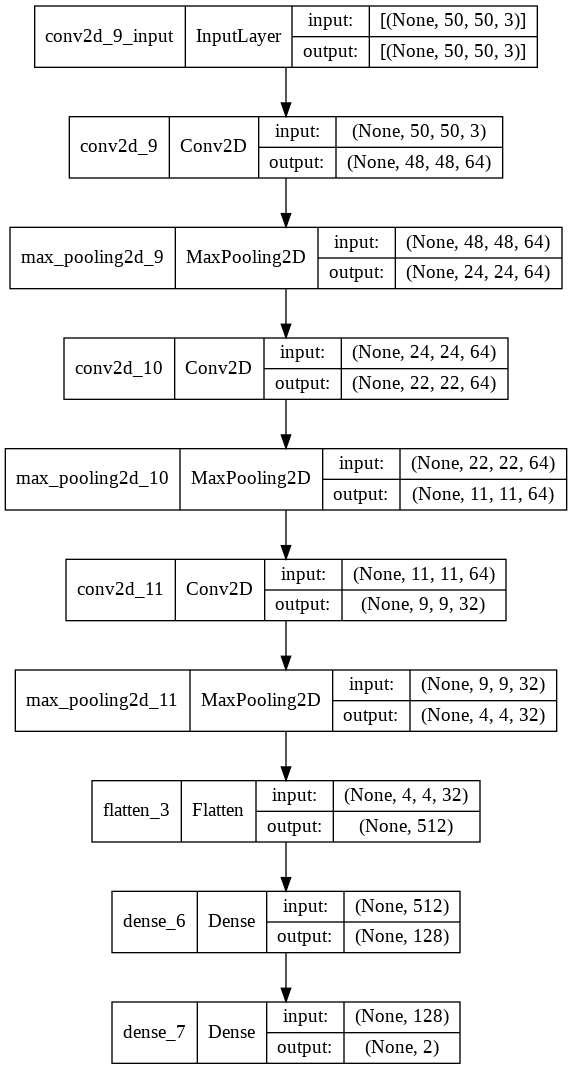

In [64]:
plot_model(model = model, show_shapes=True)

In [67]:
model.compile(optimizer=Adam(lr=0.001),loss='binary_crossentropy',metrics = ['accuracy','Precision','Recall'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [68]:
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs = 10)

Epoch 1/10
689/689 [==============================] - 13s 17ms/step - loss: 0.2516 - accuracy: 0.9181 - precision: 0.9190 - recall: 0.9165 - val_loss: 0.1940 - val_accuracy: 0.9390 - val_precision: 0.9399 - val_recall: 0.9385
Epoch 2/10
689/689 [==============================] - 11s 16ms/step - loss: 0.1849 - accuracy: 0.9413 - precision: 0.9415 - recall: 0.9408 - val_loss: 0.1824 - val_accuracy: 0.9439 - val_precision: 0.9445 - val_recall: 0.9425
Epoch 3/10
689/689 [==============================] - 11s 16ms/step - loss: 0.1674 - accuracy: 0.9485 - precision: 0.9487 - recall: 0.9483 - val_loss: 0.1757 - val_accuracy: 0.9470 - val_precision: 0.9474 - val_recall: 0.9468
Epoch 4/10
689/689 [==============================] - 11s 16ms/step - loss: 0.1606 - accuracy: 0.9511 - precision: 0.9512 - recall: 0.9505 - val_loss: 0.1674 - val_accuracy: 0.9492 - val_precision: 0.9499 - val_recall: 0.9490
Epoch 5/10
689/689 [==============================] - 11s 16ms/step - loss: 0.1525 - accuracy: 0

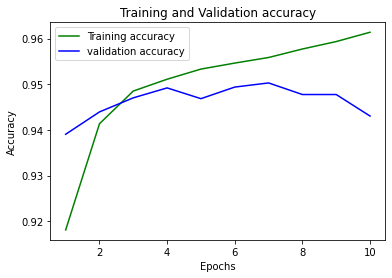

In [69]:
accuracy_train = history.history['accuracy']
accuracy_val = history.history['val_accuracy']
epochs = range(1,11)
plt.plot(epochs, accuracy_train, 'g', label='Training accuracy')
plt.plot(epochs, accuracy_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

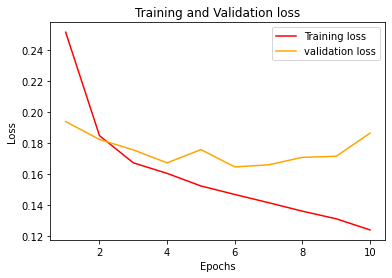

In [70]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
plt.plot(epochs, loss_train, 'r', label='Training loss')
plt.plot(epochs, loss_val, 'orange', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Reference code

https://www.analyticsvidhya.com/blog/2021/09/image-segmentation-algorithms-with-implementation-in-python/

https://www.askpython.com/python-modules/opencv-filter2d